In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
import seaborn as sns

In [10]:
point_df = pd.read_csv('data/scrabble-point-spread.csv')
point_df.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [9]:
tourment_df = pd.read_csv('data/scrabble-tournament.csv')
tourment_df.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


In [22]:
merged_point = point_df.merge(tourment_df, left_on = 'player_id', right_on = 'Player ID')
merged_point

,player_id,points_against,points_for,tournament_id,Byes,Credits,Losses,Name,New Rating,Old Rating,...,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,6003,381,443,8163,NaN,NaN,7,Nigel Richards,2196,2168.0,...,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,20749,375,435,8163,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,...,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,19535,391,443,8163,NaN,NaN,8,Will Anderson,2093,2054.0,...,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,18474,386,439,8163,NaN,NaN,9,Noah Walton,2063,2015.0,...,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,583,396,450,8163,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,...,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1
5,55,400,424,8163,NaN,NaN,10,Scott Appel,2001,1920.0,...,2177.0,6,55,$700,27,746,NaN,8163,21,Division 1
6,20383,402,415,8163,NaN,NaN,10,Mack Meller,2035,2014.0,...,2114.0,7,20383,$600,9,397,1.0,8163,20,Division 1
7,2105,403,434,8163,NaN,NaN,11,Rafi Stern,2033,2030.0,...,2033.0,8,2105,$500,3,960,NaN,8163,20,Division 1
8,10129,398,419,8163,NaN,NaN,11,Jesse Day,2022,2021.0,...,2028.0,9,10129,$350,7,652,1.0,8163,19,Division 1
9,728,386,424,8163,NaN,NaN,12,Dave Wiegand,2016,2000.0,...,2087.0,10,728,$250,12,1153,NaN,8163,19,Division 1


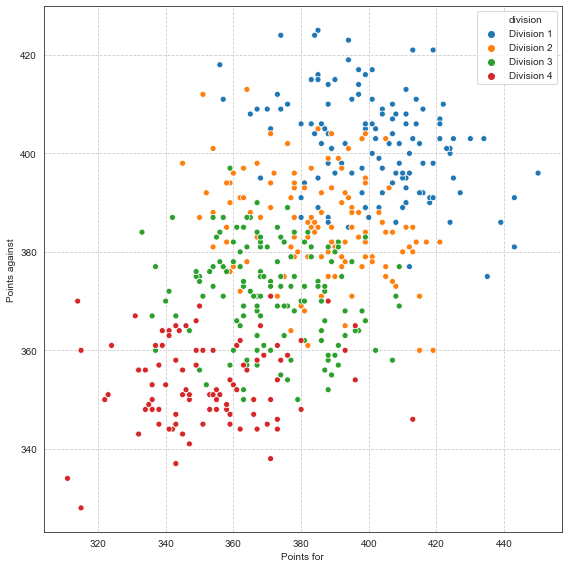

In [72]:
from matplotlib.patches import Ellipse

elps = Ellipse((0, 0), 4, 2,edgecolor='b',facecolor='none')

plt.figure(figsize=(8,8))
sns.set_style('white')
ax = sns.scatterplot(data = merged_point, 
                     x = 'points_for', 
                     y = 'points_against', 
                     hue = 'division')

ax.set_xlabel('Points for')
ax.set_ylabel('Points against')
ax.add_artist(elps)
ax.grid(linestyle = '--')

plt.tight_layout()
plt.savefig("output.pdf")

In [139]:
rank_df = pd.read_csv('data/ranked-players-with-scores.csv')
rank_df.head()

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382


In [140]:
rank = rank_df.points_for_against.str.extract('(\d\d\d)-(\d\d\d)')

In [141]:
rank_df = rank_df.merge(rank, left_index = True, right_index = True)
rank_df.head()

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against,0,1
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370,433,370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394,427,394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392,447,392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388,434,388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382,425,382


In [142]:
rank_df = rank_df.rename(columns = {0: 'for',
                          1: 'against'})
rank_df.head()

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against,for,against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370,433,370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394,427,394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392,447,392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388,434,388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382,425,382


In [ ]:
rk_df = rank_df.merge(tourment_df, left_on = 'player_id', right_on = 'Player ID')

In [195]:
rk_df = rk_df[rk_df.division =='Division 1']

In [191]:
rk_df['for'] = rk_df['for'].astype(int)
rk_df['against'] = rk_df['against'].astype(int)

/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


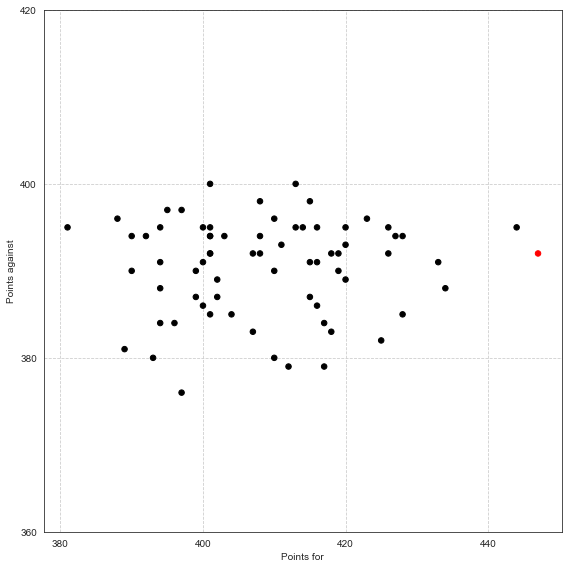

In [200]:
def build_colors(row):
    if row['name'].strip() == 'Nigel Richards':
        return 'red'
    else:
        return 'black'
    
colors = rk_df.reset_index().apply(build_colors, axis=1)
    
ax = rk_df.plot(x = 'for', 
                y = 'against', 
                color = colors, 
                kind = 'scatter',
                figsize = (8, 8),
                s = 30)
ax.set_xlabel('Points for')
ax.set_ylabel('Points against')
ax.set_xticks([380, 400, 420, 440])
ax.set_yticks([360, 380, 400, 420])
ax.grid(linestyle = '--')

plt.tight_layout()
plt.savefig("output.pdf")

In [193]:
rk_df.name

0             Will Anderson
1            Nigel Richards
2               Mack Meller
3             Ian Weinstein
4              Dave Wiegand
5       Matthew Tunnicliffe
6                Rafi Stern
7           Kenji Matsumoto
8              Joey Mallick
9               Noah Walton
10              Scott Appel
11           Charles Reinke
12            Adam Ginzberg
13               Orry Swift
14             Carl Johnson
15             Joel Sherman
16                 Jason Li
18          Cesar Del Solar
19            Thomas Reinke
20         Edward De Guzman
21               Chris Cree
22             Avery Mojica
23              Mike Frentz
24           Ben Schoenbrun
25           Chris Williams
26                Joe Edley
27                Jesse Day
28            Nigel Peltier
29              Jeremy Hall
31               Cecilia Le
              ...          
46             Jerry Lerman
47              Zev Kaufman
48            Jeff Fiszbein
49           Jesse Matthews
50              Paul

In [173]:
colors.value_counts()

lightgrey    88
red           1
dtype: int64

In [194]:
rk_df.division.unique()

array(['Division 1'], dtype=object)